# **Random Forest Implementation and Optimization using PCA Assembly**

In [ ]:

conda update --all

# Load the dataset in and store as it a numpy arrays for train and test sets

In [7]:
import os
from pprint import pprint
import pandas as pd
import numpy as np
import threading
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

os.path.isfile('/Users/16786/Desktop/fraud.csv')
df= pd.read_csv('/Users/16786/Desktop/fraud.csv')
df.fillna(-1, inplace=True)
df.head(5)
features = df.columns[0:9]
#print(features)
df['is_train'] = np.random.uniform(0,1,len(df)) <= .78
stacked = df[['type','nameOrig','nameDest']].stack()
df[['type','nameOrig','nameDest']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
print(features)
train, test = df[df['is_train']==True], df[df['is_train']==False]
print(len(train))
print(len(test))
print(train)

npTrain = train.to_numpy()
npTest = test.to_numpy()

x = npTrain[:, :-4] # all columns but the last
y = npTrain[:, -1] # expected to be from 0 to n_classes - 1
tx = npTest[:, :-4] # all columns but the last
ty = npTest[:, -1] # expected to be from 0 to n_classes - 1
print(x)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')
4964490
1398130
         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
3           1     8      181.00         9         181.00            0.00   
6           1     0     7107.77        15      183195.00       176087.23   
7           1     0     7861.64        17      176087.23       168225.59   
8           1     0     4024.36        19        2671.00            0.00   
9           1    21     5337.77        22       41720.00        36382.23   
...       ...   ...         ...       ...            ...             ...   
6362614   743     5   339682.13   9073896      339682.13            0.00   
6362615   743     8   339682.13   9073898      339682.13            0.00   
6362616   743     5  6311409.28   9073899     6311409.28            0.00   
6362618   743     5   850002.52   9073902      850002.52          

# training and testing a simple scikit-learn random forest

In [8]:
print(y)

[True True True ... True True True]


In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[features], train['isFraud'])

In [10]:
clf.predict(test[features])
pred= clf.predict(test[features])   
pd.crosstab(test['isFraud'], pred, rownames=['actually isFruad'], colnames=['predicted Fraud'])


predicted Fraud,0,1
actually isFruad,,
0,1396148,218
1,231,1533


# A from scratch implementation of a decision tree using entropy for fitting, Useful if base decision tree architecture needs to change from norm

In [11]:
import numpy as np
import math as math
class DecisionTree:
    #the constructor you can pass max depth in the constructor
    def __init__(self, maxdepth=None):
        self.maxdepth = maxdepth
    #entropy returns the larges gain in entropy reduction which can be found on some single feature x, and the cutoff used to devide the dataset. 
    def entropycounts(x, y, splits, start, end):
        for m in range(start, end):
                if(x[m] < splits):
                    count0.append(y[m])
                else:
                    count1.append(y[m])
        return count0, count1
    def entropy(self,x, y, etotal, predclass):
        gainMax = 0
        bestCutoff = -1
        
        #find potentail split locations, this will be done by first finding all unique values in the list, 
        #a mid point between each of these values will be found and used to make the split.
        unique = np.unique(x)
        #find the middle points between the unique values
        splits = []
        for n in range(0, unique.size-1):
            splits.append((unique[n] + unique[n+1])/2) 
        
        #preform and entropy calculation at each of the points in splits
        for n in range(0,  unique.size - 1):
            count0 = []
            count1 = []
            
            for m in range(0, y.size):
                if(x[m] < splits[n]):
                    count0.append(y[m])
                else:
                    count1.append(y[m])
            #now we find the lowest entropy value
            minEntropy = 1.1
            #first find out how many elements are of class 0 and 1 on each side of the tree
            c0occurrences0 = count0.count(0)
            c0occurrences1 = count0.count(1)
            
            total0 = c0occurrences0 + c0occurrences1
            c1occurrences0 = count1.count(0)
            c1occurrences1 = count1.count(1)
            total1 = c1occurrences0 + c1occurrences1
            
            if(total0 != 0 and c0occurrences0 != 0):
            #now run these numbers through the entropy equation -(c0/total)log2(c0/total) - (c1/total)log2(c1/total) alway will be less than 1
                e0 = ((c0occurrences0/total0)*math.log2(c0occurrences0/total0))* -1
            else: 
                e0 = 0
            if(total0 != 0 and c0occurrences1 != 0):
                e1 = ((c0occurrences1/total0)*math.log2(c0occurrences1/total0))* -1
            else: 
                e1 = 0
            entropy0 = e0 + e1
            if(total1 != 0 and c1occurrences0 != 0):
                e2 = ((c1occurrences0/total1)*math.log2(c1occurrences0/total1))* -1
            else: 
                e2 = 0
            if(total1 != 0 and c1occurrences1 != 0):
                e3 = ((c1occurrences1/total1)*math.log2(c1occurrences1/total1))* -1
            else: 
                e3 = 0
            entropy1 = e2 + e3
            #now that we have the entropy on both sides of the tree we can find the entropy gain of the split first find starting entropy of the node
            c0intial0 =  np.count_nonzero(y == 0)
            c0intial1 = np.count_nonzero(y == 1)
            if(c0intial0 != 0 and y.size != 0):
                e4 = ((c0intial0/y.size)*math.log2(c0intial0/y.size))* -1
            else: 
                e4 = 0
            if(c0intial1 != 0 and y.size != 0):
                e5 = ((c0intial1/y.size)*math.log2(c0intial1/y.size))* -1
            else:
                e5 = 0
            entropyOrg = e4 + e5
            #we compare the orginal entropy with the combined entropy of both sides of the split
            etotal = ((total0/y.size) * entropy0) + ((total1/y.size) * entropy1)
            #print("etotal has been made", etotal)
            gain = entropyOrg - etotal
            if(gain > gainMax):
                
                gainMax = gain
                bestCutoff = splits[n]
            if(c0intial0 >= c0intial1):
                predclass = 0
            else:
                predclass = 1
                
                
        #math.log2()
        
        return gainMax, bestCutoff, etotal, predclass
    #this will call the entropy function on each of the features returning the feature will return the highest entropy gain and the cutoff used for that split
    def find_best_split(self, x, y, depth, etotal, predclass):
        bestFeature = -1
        cutoff = -1
        bestGain = 0
        for i in range(0, np.size(x,1)):
            tempBG, tempCF, etotal, predclass = self.entropy(x[:,i],y, etotal, predclass)
            
            if(tempBG > bestGain):
                bestGain = tempBG
                bestFeature = i
                cutoff = tempCF
                predclass = predclass
            #print(tempBG)
        if(predclass == -1):
            predclass == 1
        return bestFeature, cutoff, predclass, etotal
    #this will call the recursive function which generates a tree that is stored in tree. 
    def fit(self, x, y):
        print('hi')
        self.tree = self.generateTree(x, y, 0, 0)
        print("self.tree")
    def generateTree(self, x, y, depth,pastpred):
        #find out entropy information for the node using best_split function
        bestFeature, cutoff ,pred, etotal = self.find_best_split(x, y, depth, 0, pastpred)
        entropy = etotal
        node = Node(
            cutoff = cutoff,
            pred = pred,
            entropy = etotal,
            bestFeature = bestFeature
        )
        #print('predicted class at node', pred)
        #print("cut off ", cutoff)
        #print("bestfeature ", bestFeature)
        print("depth ", depth)
        #print('entropy of resulting nodes', etotal)
        #now split into new tree recursivly using maxdepth and no or negative infomation gain to cut off the recursion.
        if depth < self.maxdepth:
            #bestFeature will hold a value of negative one if not feature produced an information gain
            if bestFeature > -1:
                indexsL = []
                indexsR = []
                for i in range (0, y.size):
                    if(x[i,bestFeature] <= cutoff):
                        indexsL.append(i)
                    else:
                        indexsR.append(i)
                xl, yl = x[indexsL], y[indexsL]
                xr, yr = x[indexsR], y[indexsR]
                #print("indexs of new left node ", indexsL)
                
                
                depth += 1
                node.left = self.generateTree(xl, yl, depth, node.pred)
                node.right = self.generateTree(xr, yr, depth, node.pred)
        return node
     
    def predict(self, x):
        prediction = []
        for i in range(0,np.shape(x)[0]):
            node = self.tree
            while node.left:
            
                if x[i,node.bestFeature] < node.cutoff:
                    node = node.left
                else:
                    node = node.right
            prediction.append(node.pred)
        return prediction

In [12]:
class Node:
    def __init__(self, cutoff, entropy, pred, bestFeature):
        self.entropy = entropy
        self.pred = pred
        self.bestFeature = bestFeature
        self.cutoff = cutoff
        self.left = None
        self.right = None

# Random forest using the above decision tree class 

In [13]:
#from concurrent.futures import ThreadPoolExecutor, as_completed
import threading
class randomForest:
    import random
    def __init__(self, maxdepth, numbtrees, n_features_selected, n_features):
        self.maxdepth = numbtrees
        self.numbtrees = numbtrees
        self.n_features_selected = n_features_selected
        self.n_features = n_features
        self.treelist = []
        self.featuresOnEachTree = []
    def fit(self, data, y):
        threads = []
        jobs = []
        
        for i in range (0,self.numbtrees):
            self.featuresOnEachTree.append([1,2,3])
              
        for i in range (0, self.numbtrees):
            
            inpdata,self.featuresOnEachTree[i] = self.newDfWithFeatures(data, self.n_features_selected, self.n_features)
            decisionTree = DecisionTree(maxdepth = self.maxdepth)
            self.treelist.append(decisionTree)
            self.treelist[i].fit(inpdata, y)
        #with ThreadPoolExecutor(max_workers=10) as executor:
            #jobs = []
        #threads = list()
        #for i in range (0, self.numbtrees):
            #print(i)
            #self.treelist[i].fit(inpdata, y)
            #threads.append(x)
            #x.start()
        #for index, thread in enumerate(threads):
            #print("Main    : before joining thread %d.", index)
            #thread.join()
            #print("Main    : thread %d done", index)
           
            #self.treelist[i].fit(inpdata, y)
       
            #for job in as_completed.as_completed(jobs):
            # Read result from future
                #result_done = job.result()
            # Append to the list of results
                #self.treelist[job].append(result_done)
        print(self.treelist)
        print(self.featuresOnEachTree)
    def predict(self, test):
        predlist = []
        pred = []
        for i in range (0,self.numbtrees):
            data = test[:, self.featuresOnEachTree[i]]
            predlist.append(self.treelist[i].predict(data))
        for i in range (0,len(test)):
            for n in range(0,self.numbtrees):
                count0 = 0
                count1 = 0
                if(predlist[n][i] == 0):
                    count0 += 1
                else:
                    count1 +=1
            if(count0 > count1):
                pred.append(0)
            else:
                pred.append(1)
        return predlist, pred

            
    def newDfWithFeatures(self, data, n_features_selected, n_features):
        self.data = data
        featuresindex = np.random.choice(x.shape[1], n_features_selected, replace=False)
        data = data[:, featuresindex]
        pca = PCA(n_components=2)
        pca.fit(data)
        n = pca.transform(data)
        data = np.concatenate((data, n), axis=1)
        return data,featuresindex,pca
    
            
        
        

# trains a forest then tests it and prints out a simple accuracy

In [ ]:
accuracylist = []
for i in range(0, 1):    
    cfl = randomForest(maxdepth=50, numbtrees = 10, n_features_selected = 4, n_features = 6)
    cfl.fit(x, y)
    predlist, pred = cfl.predict(tx)
    #print(pred)
    #print(predlist)
    #print(pred)
    count1 = 0
    for i in range(0, ty.size):
    
        if(pred[i] == ty[i]):
        
            count1 += 1
    accuracy = count1/ty.size
    accuracylist.append(accuracy)
    #print("accuracy ", accuracy)
averageaccu = sum(accuracylist)/1
print("average ", averageaccu)

# An implementation of PCA embedded Random Forest using scikit-learn decision for effecient training

In [14]:
from sklearn.decomposition import PCA
class randomForest2:
    def __init__(self, maxdepth, numbtrees, n_features_selected, n_features):
        self.maxdepth = numbtrees
        self.numbtrees = numbtrees
        self.n_features_selected = n_features_selected
        self.n_features = n_features
        self.treelist = []
        self.featuresOnEachTree = []
        self.predlist = []
        self.pcalist = []
    def makeforest(self, data, y):
        
        for i in range (0,self.numbtrees):
            
            self.featuresOnEachTree.append([1,2,3])
            self.pcalist.append([1,2,3])
        for i in range (0, self.numbtrees):
            
            inpdata,self.featuresOnEachTree[i],self.pcalist[i] = self.newDfWithFeatures(data, self.n_features_selected, self.n_features)
            self.treelist.append(tree.DecisionTreeClassifier(max_depth = self.maxdepth,max_features = 'sqrt',criterion = "gini", min_samples_split = 10, min_samples_leaf = 8, max_leaf_nodes = None, min_impurity_decrease = 0,))
            self.treelist[i].fit(inpdata, y)
            
   
   
    
    def newDfWithFeatures(self, data, n_features_selected, n_features):
        self.data = data
        featuresindex = np.random.choice(x.shape[1], n_features_selected, replace=False)
        flist = featuresindex.tolist()

        data = data.iloc[:, flist]
        pca = PCA(n_components=2)
        pca.fit(data)
        n = pca.transform(data)
        data = np.concatenate((data, n), axis=1)
        print(data)
        return data, flist, pca
    def predict2(self, test, testtrue):
        for i in range(0, self.numbtrees):
            data = test.iloc[:, self.featuresOnEachTree[i]]
            n = self.pcalist[i].transform(data)
            test2 = np.concatenate((data, n), axis=1)
            self.predlist.append(self.treelist[i].predict(test2))
        for i in range(0, self.numbtrees):
            print(self.predlist[i])
        return self.predlist

# A random forest with no PCA embedding to compare to PCA embedded random forest

In [15]:
from sklearn.ensemble import VotingClassifier
class randomForest3:
    def __init__(self, maxdepth, numbtrees, n_features_selected, n_features):
        self.maxdepth = numbtrees
        self.numbtrees = numbtrees
        self.n_features_selected = n_features_selected
        self.n_features = n_features
        self.treelist = []
        self.featuresOnEachTree = []
        self.predlist = []
    def makeforest(self, data, y):
        
        for i in range (0,self.numbtrees):
            
            self.featuresOnEachTree.append([1,2,3])
              
        for i in range (0, self.numbtrees):
            
            inpdata,self.featuresOnEachTree[i] = self.newDfWithFeatures(data, self.n_features_selected, self.n_features)
            self.treelist.append(tree.DecisionTreeClassifier(max_depth = self.maxdepth,max_features = 'sqrt',criterion = "gini", min_samples_split = 8, min_samples_leaf = 6, max_leaf_nodes = None, min_impurity_decrease = 0,))
            self.treelist[i].fit(inpdata, y)
            
    def newDfWithFeatures(self, data, n_features_selected, n_features):
        self.data = data
        featuresindex = np.random.choice(x.shape[1], n_features_selected, replace=False)
        #print(featuresindex)
        flist = featuresindex.tolist()
        #print(data.iloc[:, flist])
        return data.iloc[:, flist], flist
    def predict2(self, test, testtrue):
        for i in range(0, self.numbtrees):
            
            self.predlist.append(self.treelist[i].predict(test.iloc[:, self.featuresOnEachTree[i]]))
        for i in range(0, self.numbtrees):
            print(self.predlist[i])
        return self.predlist

# Same as the above implemntation but with feature randomness being done inside the decision tree

In [16]:
from sklearn.decomposition import PCA
class randomForest4:
    def __init__(self, maxdepth, numbtrees, n_features_selected, n_features, minsamplesplit, minsmaplesleaf, maxfeatures):
        self.maxdepth = numbtrees
        self.numbtrees = numbtrees
        self.n_features_selected = n_features_selected
        self.n_features = n_features
        self.treelist = []
        self.featuresOnEachTree = []
        self.predlist = []
        self.pcalist = []
        self.minsamplesplit = minsamplesplit
        self.minsmaplesleaf = minsmaplesleaf
        self.maxfeatures = maxfeatures
    def makeforest(self, data, y):
        
        for i in range (0,self.numbtrees):
            
            self.featuresOnEachTree.append([1,2,3])
            self.pcalist.append([1,2,3])
        for i in range (0, self.numbtrees):
            
            inpdata,self.featuresOnEachTree[i],self.pcalist[i] = self.newDfWithFeatures(data, self.n_features_selected, self.n_features)
            self.treelist.append(tree.DecisionTreeClassifier(max_depth = self.maxdepth,max_features = self.maxfeatures,criterion = "gini", min_samples_split = self.minsamplesplit, min_samples_leaf = self.minsmaplesleaf, max_leaf_nodes = None, min_impurity_decrease = 0,))
            self.treelist[i].fit(inpdata, y)
            
   
   
    
    def newDfWithFeatures(self, data, n_features_selected, n_features):
        self.data = data
        featuresindex = np.random.choice(x.shape[1], n_features_selected, replace=False)
        flist = featuresindex.tolist()
        data2 = data.iloc[:, flist]
        pca = PCA(n_components=1)
        pca.fit(data2)
        n = pca.transform(data2)
        data = np.concatenate((data, n), axis=1)
        #print(data)
        return data, flist, pca
    def predict2(self, test, testtrue):
        for i in range(0, self.numbtrees):
            #data = test.iloc[:, self.featuresOnEachTree[i]]
            data2 = test.iloc[:, self.featuresOnEachTree[i]]
            n = self.pcalist[i].transform(data2)
            test2 = np.concatenate((test, n), axis=1)
            self.predlist.append(self.treelist[i].predict(test2))
        for i in range(0, self.numbtrees):
            print(self.predlist[i])
        return self.predlist
    

In [17]:

class randomForest5:
    def __init__(self, maxdepth, numbtrees, n_features, minsamplesplit, minsmaplesleaf, maxfeatures):
        self.maxdepth = numbtrees
        self.numbtrees = numbtrees
        self.n_features = n_features
        self.treelist = []
        self.featuresOnEachTree = []
        self.predlist = []
        self.pcalist = []
        self.minsamplesplit = minsamplesplit
        self.minsmaplesleaf = minsmaplesleaf
        self.maxfeatures = maxfeatures
    def makeforest(self, data, y):
        print('here')
        
        #for i in range (0,self.numbtrees):
            
        #    self.featuresOnEachTree.append([1,2,3])
        #    self.pcalist.append([1,2,3])
        for i in range (0, self.numbtrees):
            
            #inpdata,self.featuresOnEachTree[i],self.pcalist[i] = self.newDfWithFeatures(data, self.n_features_selected, self.n_features)
            self.treelist.append(tree.DecisionTreeClassifier(max_depth = self.maxdepth,max_features = self.maxfeatures,criterion = "gini", min_samples_split = self.minsamplesplit, min_samples_leaf = self.minsmaplesleaf, max_leaf_nodes = None, min_impurity_decrease = 0,))
            self.treelist[i].fit(data, y)
            
   
   
    
    def newDfWithFeatures(self, data, n_features_selected, n_features):
        self.data = data
        featuresindex = np.random.choice(x.shape[1], n_features_selected, replace=False)
        flist = featuresindex.tolist()
        data2 = data.iloc[:, flist]
        pca = PCA(n_components=2)
        pca.fit(data2)
        n = pca.transform(data2)
        data = np.concatenate((data, n), axis=1)
        #print(data)
        return data, flist
    def predict2(self, test, testtrue):
        for i in range(0, self.numbtrees):
            #data = test.iloc[:, self.featuresOnEachTree[i]]
            #data2 = test.iloc[:, 9]
            
            self.predlist.append(self.treelist[i].predict(test))
        for i in range(0, self.numbtrees):
            print(self.predlist[i])
        return self.predlist

# Randomized Grid Search optimization 

In [22]:
print(shape(x))

NameError: name 'shape' is not defined

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import random
depth = []
numbtrees = []
n_featuresselected = []
samplesleaf = []
samplessplit = []
maxfeatures = []
f1scores1 = []
precsionsc1 = []
y = train['isFraud']
for i in range(0, 20):
    depth.append(random.randint(10,50))
    numbtrees.append(random.randint(10,51))
    n_featuresselected.append(random.randint(3,9))
    samplesleaf.append(random.randint(1,15))
    samplessplit.append(random.randint(2,15))
    maxfeatures.append(random.randint(3,9))
    #rf = randomForest5(maxdepth=depth[i], numbtrees = numbtrees[i], n_features_selected = n_featuresselected[i], n_features = 9, minsamplesplit = samplessplit[i], minsmaplesleaf = samplesleaf[i], maxfeatures = maxfeatures[i])
    rf = randomForest5(maxdepth=depth[i], numbtrees = numbtrees[i], n_features = 9, minsamplesplit = samplessplit[i], minsmaplesleaf = samplesleaf[i], maxfeatures = maxfeatures[i])
    rf.makeforest(train[features], y)
    preditionslist = []
    features2 = []
    print("hi")
    for j in range (0, len(features)):
        features2.append(j)
    testset = test.iloc[:, features2]
    print(testset)
    yt = test['isFraud']
    print(yt)
    preditionslist = rf.predict2(test[features], yt)
    finalpreditions = []
    for m in range (0, len(test['isFraud'])):
        count1 = 0
        count0 = 0
        for n in range (0, numbtrees[i]):
            if(int(preditionslist[n][m]) == 1):
                count1 += 1
            if(int(preditionslist[n][m]) == 0):
                count0 += 1
        if (count0 > count1):
            finalpreditions.append(0)
        if (count0 <= count1):
            finalpreditions.append(1)
    f1scores1.append(f1_score(np.array(test['isFraud']), np.array(finalpreditions)))
    precsionsc1.append(precision_score(np.array(test['isFraud']), np.array(finalpreditions)))

    

here
hi
         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     0     9839.64         1      170136.00       160296.36   
1           1     0     1864.28         3       21249.00        19384.72   
2           1     5      181.00         6         181.00            0.00   
4           1     0    11668.14        11       41554.00        29885.86   
5           1     0     7817.71        13       53860.00        46042.29   
...       ...   ...         ...       ...            ...             ...   
6362605   742     8    54652.46   9073882       54652.46            0.00   
6362610   742     5    63416.99   9073890       63416.99            0.00   
6362611   742     8    63416.99   9073892       63416.99            0.00   
6362612   743     5  1258818.82   9073893     1258818.82            0.00   
6362617   743     8  6311409.28   9073901     6311409.28            0.00   

         nameDest  oldbalanceDest  newbalanceDest  
0               2          

In [ ]:
f1scores.sort()

In [ ]:
print(test[''])

In [28]:
print(samplesleaf)

[6]


In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

import random
y = train['isFraud']
depth = []
numbtrees = []
n_featuresselected = []
samplesleaf = []
samplessplit = []
maxfeatures = []
f1scores = []
precsionsc = []
for i in range(0, 20):
    depth.append(random.randint(10,50))
    numbtrees.append(random.randint(10,51))
    samplesleaf.append(random.randint(1,15))
    samplessplit.append(random.randint(2,15))
    maxfeatures.append(random.randint(3,9))
    n_featuresselected.append(random.randint(3,8))
    rf = randomForest4(maxdepth=depth[i], numbtrees = numbtrees[i], n_features_selected = n_featuresselected[i], n_features = 9, minsamplesplit = samplessplit[i], minsmaplesleaf = samplesleaf[i], maxfeatures = maxfeatures[i])
    #rf = randomForest4(maxdepth=depth[i], numbtrees = numbtrees[i], n_features = 9, minsamplesplit = samplessplit[i], minsmaplesleaf = samplesleaf[i], maxfeatures = maxfeatures[i])
    rf.makeforest(train[features], y)
    preditionslist = []
    features2 = []
    print("hi")
    for j in range (0, len(features)):
        features2.append(j)
    testset = test.iloc[:, features2]
    print(testset)
    yt = test['isFraud']
    print(yt)
    preditionslist = rf.predict2(test[features], yt)
    finalpreditions = []
    for m in range (0, len(test['isFraud'])):
        count1 = 0
        count0 = 0
        for n in range (0, numbtrees[i]):
            if(int(preditionslist[n][m]) == 1):
                count1 += 1
            if(int(preditionslist[n][m]) == 0):
                count0 += 1
        if (count0 > count1):
            finalpreditions.append(0)
        if (count0 <= count1):
            finalpreditions.append(1)
    f1scores.append(f1_score(np.array(test['isFraud']), np.array(finalpreditions)))
    precsionsc.append(precision_score(np.array(test['isFraud']), np.array(finalpreditions)))

hi
         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     0     9839.64         1      170136.00       160296.36   
1           1     0     1864.28         3       21249.00        19384.72   
2           1     5      181.00         6         181.00            0.00   
4           1     0    11668.14        11       41554.00        29885.86   
5           1     0     7817.71        13       53860.00        46042.29   
...       ...   ...         ...       ...            ...             ...   
6362605   742     8    54652.46   9073882       54652.46            0.00   
6362610   742     5    63416.99   9073890       63416.99            0.00   
6362611   742     8    63416.99   9073892       63416.99            0.00   
6362612   743     5  1258818.82   9073893     1258818.82            0.00   
6362617   743     8  6311409.28   9073901     6311409.28            0.00   

         nameDest  oldbalanceDest  newbalanceDest  
0               2            0.0

In [33]:
for i in range(0, 20):
    print(f1scores[i])
    print(depth[i])
    print(numbtrees[i])
    #print(n_featuresselected[i])
    print(samplesleaf[i])
    print(samplessplit[i])
    print(maxfeatures[i])
    #0.8851331996562589
    #$15
    #30
    #8
    #2
    #4
    #7

0.8713304184884446
50
44
12
12
4
0.882909520993495
23
22
3
5
9
0.8256157635467979
44
11
3
3
6
0.8627450980392158
27
46
10
15
3
0.8511450381679388
23
13
7
15
8
0.8674698795180723
24
30
11
12
8
0.878498923408182
48
41
6
2
5
0.8660869565217392
36
29
9
8
9
0.851472471190781
12
17
15
8
3
0.872495446265938
24
39
8
12
6
0.8896776101745045
35
31
1
8
7
0.8563101136694842
49
45
14
13
9
0.8761552680221811
14
27
8
10
5
0.8638792832442629
21
38
12
12
4
0.8762143528674396
22
38
3
10
3
0.8868501529051986
41
49
4
10
5
0.8510230179028133
13
14
4
14
4
0.8910772903610863
15
35
1
8
6
0.8746518105849581
34
32
6
12
4
0.8687116564417178
31
19
11
8
7


In [ ]:
for i in range(0, 50):
    print(f1scores[i])
    print(depth[i])
    print(numbtrees[i])
    #print(n_featuresselected[i])
    print(samplesleaf[i])
    print(samplessplit[i])
    print(maxfeatures[i])
    

In [ ]:
#precsionsc1.sort()
#print(precsionsc1)
precsionsc.sort()
print(precsionsc)

# storage of results should be writen to database or file instead

In [ ]:
f1scores.sort()
print(f1scores)
f1scoresPCA = [0.8739811912225706, 0.8751926040061633, 0.8811487931561258, 0.8643692696806827, 0.85312, 0.8749612162581446, 0.8719550281074329,
               0.8654025489586572,0.8687921520539547, 0.846079380445305,0.7691242644513673, 0.8019900497512439, 0.8548745633534455, 0.8734293594851363, 0.852772466539197,
               0.8514285714285715, 0.871397582894329, 0.8831405964698722, 0.8714285714285713, 0.8602287166454892, 0.8695920889987638, 0.861318407960199, 0.8748451053283766,
               0.7973288814691152, 0.8773993808049536, 0.8723274282223581, 0.8274509803921569, 0.8650843222985635, 0.8725, 0.8761961722488039, 0.8642659279778392,
               0.8648982109808759, 0.8648982109808759, 0.8649155722326454, 0.8594097112027927, 0.871578947368421, 0.8567774936061381, 0.8693790149892934,
               0.8636505460218409, 0.8764940239043825, 0.8567815365159658, 0.8771615980918307, 0.877268532759151, 0.8590561224489796, 0.8953728264073091,
               0.8638180141407932, 0.854146806482364, 0.8732565191024865, 0.8693790149892934, 0.8523641042135734]
precsionsc1 = [0.9004576659038902, 0.9130434782608695, 0.9332129963898917, 0.9383521043272081, 0.9386323787258913, 0.9416319237641453, 0.9442761962447002, 
               0.9476190476190476, 0.9594423320659062, 0.9599491417673236, 0.968609865470852, 0.9707379134860051, 0.9720101781170484, 0.9776876267748479, 
               0.9812709030100334, 
               0.9832214765100671, 0.9853862212943633, 0.9856819894498869, 0.9872311827956989, 0.9910096818810512]
precsionsc1.sort()
f1scoresPCA.sort()
print(precsionsc1)

# Comparision of RF and RF-PCA precision

[0.8713304184884446, 0.882909520993495, 0.8256157635467979, 0.8627450980392158, 0.8511450381679388, 0.8674698795180723, 0.878498923408182, 0.8660869565217392, 0.851472471190781, 0.872495446265938, 0.8896776101745045, 0.8563101136694842, 0.8761552680221811, 0.8638792832442629, 0.8762143528674396, 0.8868501529051986, 0.8510230179028133, 0.8910772903610863, 0.8746518105849581, 0.8687116564417178]


<function matplotlib.pyplot.show(close=None, block=None)>

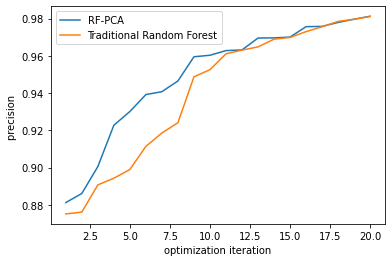

In [36]:
import matplotlib.pyplot as plt
list_1_to_49 = []
print(f1scores)
precsionsc1.sort()
precsionsc.sort()
for x in range (0,20):
    list_1_to_49.append(x+1)
    #a graph showing the results of the test set accuracy of the first 99 k values
plt.plot(list_1_to_49, precsionsc,  label="RF-PCA")
plt.plot(list_1_to_49, precsionsc1, label="Traditional Random Forest")
plt.xlabel('optimization iteration') 
# naming the y axis 
plt.ylabel('precision ')
plt.legend()
plt.show

# Comparision of F1-scores

[0.8256157635467979, 0.8510230179028133, 0.8511450381679388, 0.851472471190781, 0.8563101136694842, 0.8627450980392158, 0.8638792832442629, 0.8660869565217392, 0.8674698795180723, 0.8687116564417178, 0.8713304184884446, 0.872495446265938, 0.8746518105849581, 0.8761552680221811, 0.8762143528674396, 0.878498923408182, 0.882909520993495, 0.8868501529051986, 0.8896776101745045, 0.8910772903610863]


<function matplotlib.pyplot.show(close=None, block=None)>

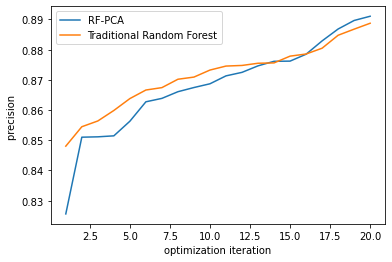

In [38]:
import matplotlib.pyplot as plt
list_1_to_49 = []
print(f1scores)
f1scores1.sort()
f1scores.sort()
for x in range (0,20):
    list_1_to_49.append(x+1)
    #a graph showing the results of the test set accuracy of the first 99 k values
plt.plot(list_1_to_49, f1scores,  label="RF-PCA")
plt.plot(list_1_to_49, f1scores1, label="Traditional Random Forest")
plt.xlabel('optimization iteration') 
# naming the y axis 
plt.ylabel('precision ')
plt.legend()
plt.show

In [ ]:
f1scoresPCA11 = [0.8739811912225706, 0.8751926040061633, 0.8811487931561258, 0.8643692696806827, 0.85312, 0.8749612162581446, 0.8719550281074329,
               0.8654025489586572,0.8687921520539547, 0.846079380445305,0.7691242644513673, 0.8019900497512439, 0.8548745633534455, 0.8734293594851363, 0.852772466539197,
               0.8514285714285715, 0.871397582894329, 0.8831405964698722, 0.8714285714285713, 0.8602287166454892, 0.8695920889987638, 0.861318407960199, 0.8748451053283766,
               0.7973288814691152, 0.8773993808049536, 0.8723274282223581, 0.8274509803921569, 0.8650843222985635, 0.8725, 0.8761961722488039, 0.8642659279778392,
               0.8648982109808759, 0.8648982109808759, 0.8649155722326454, 0.8594097112027927, 0.871578947368421, 0.8567774936061381, 0.8693790149892934,
               0.8636505460218409, 0.8764940239043825, 0.8567815365159658, 0.8771615980918307, 0.877268532759151, 0.8590561224489796, 0.8953728264073091,
               0.8638180141407932, 0.854146806482364, 0.8732565191024865, 0.8693790149892934, 0.8523641042135734]
f1scoresPCA11.sort()
print(f1scoresPCA11)

In [ ]:
rf = randomForest(maxdepth=50, numbtrees = 51, n_features_selected = 5, n_features = 9)
rf.makeforest(x, y)

In [ ]:
print(test[features])

In [ ]:
# 

In [ ]:
preditionslist = []
features2 = []
print("hi")
for i in range (0, len(features)):
    features2.append(i)
testset = test.iloc[:, features2]
print(testset)
yt = test['isFraud']
print(yt)
preditionslist = rf.predict2(testset, yt)
finalpreditions = []
for i in range (0, len(test['isFraud'])):
    count1 = 0
    count0 = 0
    for n in range (0, 51):
        if(int(preditionslist[n][i]) == 1):
            count1 += 1
        if(int(preditionslist[n][i]) == 0):
            count0 += 1
    if (count0 > count1):
        finalpreditions.append(0)
    if (count0 <= count1):
        finalpreditions.append(1)
#print(finalpreditions)

In [ ]:
print(finalpreditions[0:10])
print(len(finalpreditions))
print(len(test['isFraud']))

In [ ]:
pd.crosstab(np.array(test['isFraud']), np.array(finalpreditions), rownames=['actually isFruad'], colnames=['predicted Fraud'], margins=True)


In [ ]:
{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': 'balanced',
 'bootstrap': False}

In [ ]:
count = 0
for i in range (0, len(finalpreditions)):
    if(finalpreditions[i] == 1):
        count += 1
print(count)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2= RandomForestClassifier(n_jobs=1,random_state=0,n_estimators = 10,criterion = "gini", max_features = 'sqrt', max_depth = 50, min_samples_split = 10, min_samples_leaf = 8, max_leaf_nodes = None, min_impurity_decrease = 0, class_weight = "balanced")
clf2.fit(x,y)
clf2.predict(test[features])
pred= clf2.predict(test[features])   
pd.crosstab(test['isFraud'], pred, rownames=['actual isFruad'], colnames=['predicted Fraud'])

In [ ]:
pred= clf2.predict(test[features])   
pd.crosstab(test['isFraud'], pred, rownames=['actual isFruad'], colnames=['predicted Fraud'])


In [ ]:
print(x)

#rf7 = randomForest5(maxdepth=32, numbtrees = 51, n_features_selected = 3 ,n_features = 9, minsamplesplit = 4, minsmaplesleaf = 1, maxfeatures = 8)
rf7 = randomForest5(maxdepth=32, numbtrees = 51 ,n_features = 9, minsamplesplit = 4, minsmaplesleaf = 1, maxfeatures = 8)
rf7.makeforest(x, y)

In [ ]:
preditionslist2 = []
features22 = []
for i in range (0, len(features)):
    features22.append(i)
testset = test.iloc[:, features22]
print(testset)
yt = test['isFraud']
print(yt)
preditionslist2 = rf7.predict2(testset, yt)
finalpreditions2 = []
for i in range (0, len(test['isFraud'])):
    count1 = 0
    count0 = 0
    for n in range (0, 51):
        if(int(preditionslist2[n][i]) == 1):
            count1 += 1
        if(int(preditionslist2[n][i]) == 0):
            count0 += 1
    if (count0 > count1):
        finalpreditions2.append(0)
    if (count0 <= count1):
        finalpreditions2.append(1)
#print(finalpreditions)

In [ ]:


pd.crosstab(np.array(test['isFraud']), np.array(finalpreditions2), rownames=['actually isFruad'], colnames=['predicted Fraud'], margins=True)